<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Tool_competence_visualization_116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn openpyxl


Data Loaded Successfully!


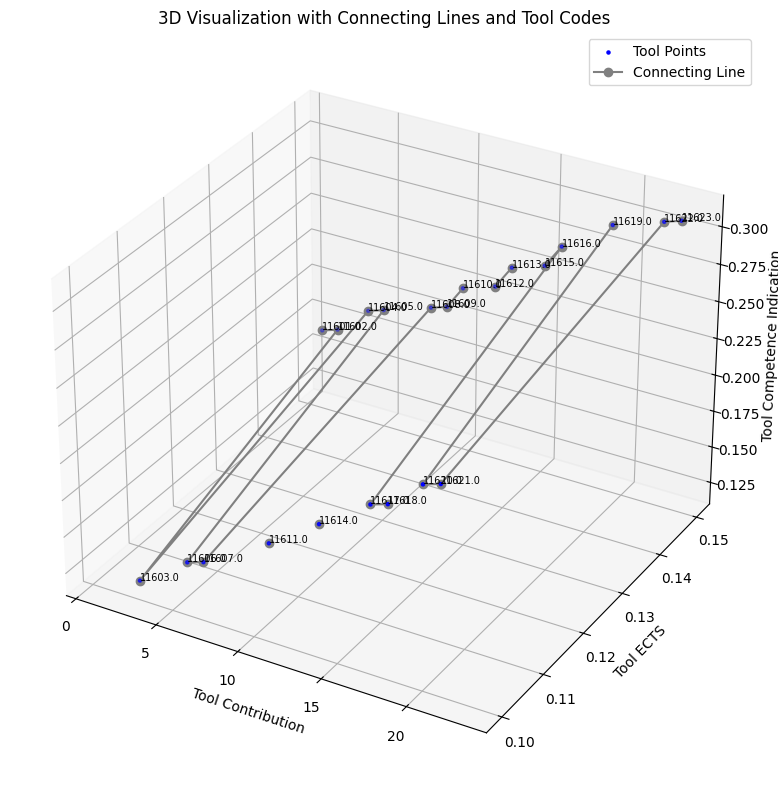

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Excel Data
def load_data(file_path):
    try:
        data = pd.read_excel(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# 3D Visualization with Connecting Lines and Axes
def visualize_3d_with_lines(data):
    # Ensure column names are correct
    tool_code = data['Tool_code']  # Replace with exact column name
    tool_contribution = data['Tool_contribution']  # Replace with exact column name
    tool_ects = data['Tool_ECTS']  # Replace with exact column name
    tool_competence_indication = data['Tool_competence_indication']  # Replace with exact column name

    # Create 3D figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(tool_contribution, tool_ects, tool_competence_indication,
               c='blue', s=5, label='Tool Points', depthshade=True)

    # Annotate points with Tool_code
    for i in range(len(tool_code)):
        ax.text(tool_contribution[i], tool_ects[i], tool_competence_indication[i],
                f'{tool_code[i]}', fontsize=7, color='black')

    # Plot each data point as a vertical line and a horizontal line connecting to others
    for i in range(len(tool_contribution)):
        x = [tool_ects[i]]  # Horizontal line starting point for X
        y = [tool_competence_indication[i]]  # Horizontal line starting point for Y
        z = [0, tool_code[i]]  # Vertical line from 0 to Tool Contribution

    # Connecting line between points
    ax.plot(tool_contribution, tool_ects, tool_competence_indication,
            color='gray', linestyle='-', marker='o', label='Connecting Line')

    # Set axis labels
    ax.set_xlabel('Tool Contribution')
    ax.set_ylabel('Tool ECTS')
    ax.set_zlabel('Tool Competence Indication')

    # Title and legend
    ax.set_title('3D Visualization with Connecting Lines and Tool Codes')
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = "/content/rke116-8122024.xlsx"  # Update with the path to your Excel file
    data = load_data(file_path)

    if data is not None:
        visualize_3d_with_lines(data)
